## INCLUDES:

# LINEAR REGRESSION

# RANDOM FOREST REGRESSOR

# GRADIENT BOOSTING REGRESSOR

In [1]:
import pandas as pd
import numpy as np
import my_pickle as mp
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestRegressor

import my_resample as ms

import warnings
warnings.filterwarnings('ignore')


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import plot_partial_dependence

In [4]:
X = mp.unjson_it('data_X')
y = mp.unjson_it('data_y')['convo_length']
text_similarity_df = mp.unjson_it('data_text_similarity')
X['text_similarity'] = text_similarity_df

# LINEAR REGRESSION

In [5]:
def wrangle_data(resamp):
#     # GET DATA
#     y = X_df.convo_length
#     X = X_df.drop(['convo_length'], axis=1)

    # TRAIN TEST SPLIT
    X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), random_state=17)

    # RESAMPLE
    X_train, y_train = ms.oversample(X_train, y_train, resamp)

    # SCALE DATA
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

In [6]:
def fit_model():
    # fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train))

    # make predictions
    y_pred = model.predict(X_test)

### CONVERT TO BINARY AND GET ACURACY ETC

In [7]:
def convert_to_binary():
    y_pred_binary = [1 if x > 1 else 0 for x in y_pred]
    y_test_binary = [1 if x > 1 else 0 for x in y_test]

    print("\nMETRICS")
    print("Model recall: {}".format(recall_score(y_test_binary, y_pred_binary)))
    print("Model precision: {}".format(precision_score(y_test_binary, y_pred_binary)))
    print("Model accuracy: {}".format(model.score(X_test, y_test_binary)))

    print ("\nCONFUSION MATRIX")
    print (confusion_matrix(y_test_binary, y_pred_binary))
    print ("\nkey:")
    print (" TN   FP ")
    print (" FN   TP ")
    
    return recall_score(y_test_binary, y_pred_binary), precision_score(y_test_binary, y_pred_binary)

### RESAMPLE AS A HYPERPARAMETER

In [8]:
def all_together(X_df,resamp,cutoff):
    # GET DATA
    y = X_df.convo_length
    X = X_df.drop(['convo_length'], axis=1)

    # TRAIN TEST SPLIT
    X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), random_state=17)

    # RESAMPLE
    X_train, y_train = ms.oversample(X_train, y_train, resamp)

    # SCALE DATA
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    # fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
#     print(model.score(X_train, y_train))

    # make predictions
    y_pred = model.predict(X_test)
    
    y_pred_binary = [1 if x > cutoff else 0 for x in y_pred]
    y_test_binary = [1 if x > cutoff else 0 for x in y_test]
    
    return recall_score(y_test_binary, y_pred_binary), precision_score(y_test_binary, y_pred_binary)

In [9]:
recall = []
precision = []
x_values = np.arange(.01,10,.01)
for x in x_values:
    r,p = all_together(X_df,x, 1)
    recall.append(r)
    precision.append(p)

NameError: name 'X_df' is not defined

In [10]:
fig, ax = plt.subplots()
ax.plot(x_values, recall)
ax.plot(x_values, precision)
ax.set_title('RECALL AND PRECISION')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (999,) and (0,)

# RANDOM FOREST REGRESSOR

In [ ]:
# GET DATA
y = X_df.convo_length
X = X_df.drop(['convo_length','response'], axis=1)

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), random_state=17)

# RESAMPLE
# X_train, y_train = ms.oversample(X_train, y_train, .5)

# SCALE DATA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# fit model
model = RandomForestRegressor()
model.fit(X_train, y_train, sample_weight=None)

In [ ]:
# get feature importances
feature_importances = np.argsort(model.feature_importances_)
top_n = 10 #len(X.columns)
print("\nFEATURE RANKINGS")
for n in range(top_n):
    print(n+1, '\t',X.columns[feature_importances[-n-1]], '\t',sorted(model.feature_importances_)[-n-1])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
def change_cutoff(cutoff, lotsa = True):
    y_pred_binary = [1 if x > cutoff else 0 for x in y_pred]
    y_test_binary = [1 if x > cutoff else 0 for x in y_test]

    if lotsa:
        print("\nMETRICS")
        print("Model recall: {}".format(recall_score(y_test_binary, y_pred_binary)))
        print("Model precision: {}".format(precision_score(y_test_binary, y_pred_binary)))
        print("Model accuracy: {}".format(model.score(X_test, y_test_binary)))

        print ("\nCONFUSION MATRIX")
        print (confusion_matrix(y_test_binary, y_pred_binary))
        print ("\nkey:")
        print (" TN   FP ")
        print (" FN   TP ")
    
    return recall_score(y_test_binary, y_pred_binary), precision_score(y_test_binary, y_pred_binary)

change_cutoff(1)

In [ ]:
def plot_recall_precision():
    recall = []
    precision = []
    x_values = np.arange(0,10,.1)
    for cutoff in x_values:
        r,p = change_cutoff(cutoff,False)
        recall.append(r)
        precision.append(p)
    fig, ax = plt.subplots()
    ax.plot(x_values, recall)
    ax.plot(x_values, precision)
    ax.set_title('RECALL AND PRECISION')
    plt.show()
plot_recall_precision()

# GRADIENT BOOSTING REGRESSOR

In [11]:
# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), random_state=17)

# RESAMPLE
X_train, y_train = ms.oversample(X_train, y_train, .5)

# SCALE DATA
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# fit model
model = GradientBoostingRegressor()
model.fit(X_train, y_train, sample_weight=None)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [14]:
# get feature importances
feature_importances = np.argsort(model.feature_importances_)
top_n = 10 #len(X.columns)
print("\nFEATURE RANKINGS")
for n in range(top_n):
    print(n+1, '\t',X.columns[feature_importances[-n-1]], '\t',sorted(model.feature_importances_)[-n-1],'\t',feature_importances[-n-1])


FEATURE RANKINGS
1 	 distance 	 0.162022472137 	 6
2 	 urgency_receiver 	 0.130079098688 	 69
3 	 rent_overlap 	 0.0942867491783 	 45
4 	 text_similarity 	 0.08484195472 	 71
5 	 urgency_sender 	 0.0690888016528 	 70
6 	 maxCost_receiver 	 0.0554878199988 	 32
7 	 len_about_receiver 	 0.0356178022581 	 30
8 	 minCost_sender 	 0.0330666179569 	 35
9 	 type_sender 	 0.0290452086477 	 68
10 	 age_dif 	 0.0257227259283 	 2


In [ ]:
feature_importances[-4:]
# X.columns[feature_importances[-4:]]

In [ ]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)

In [ ]:
def change_cutoff(cutoff, lotsa = True):
    y_pred_binary = [1 if x > cutoff else 0 for x in y_pred]
    y_test_binary = [1 if x > cutoff else 0 for x in y_test]

    if lotsa:
        print("\nMETRICS")
        print("Model recall: {}".format(recall_score(y_test_binary, y_pred_binary)))
        print("Model precision: {}".format(precision_score(y_test_binary, y_pred_binary)))
        print("Model accuracy: {}".format(model.score(X_test, y_test_binary)))

        print ("\nCONFUSION MATRIX")
        print (confusion_matrix(y_test_binary, y_pred_binary))
        print ("\nkey:")
        print (" TN   FP ")
        print (" FN   TP ")
    
    return recall_score(y_test_binary, y_pred_binary), precision_score(y_test_binary, y_pred_binary)

change_cutoff(1.5)

In [ ]:
def plot_recall_precision():
    recall = []
    precision = []
    x_values = np.arange(0,10,.1)
    for cutoff in x_values:
        r,p = change_cutoff(cutoff,False)
        recall.append(r)
        precision.append(p)
    fig, ax = plt.subplots()
    ax.plot(x_values, recall)
    ax.plot(x_values, precision)
    ax.set_title('RECALL AND PRECISION')
    plt.show()
plot_recall_precision()

In [ ]:
plot_partial_dependence(model, X_train, feature_importances[-6:], X.columns, n_jobs=-1,figsize = (16,8))
plt.show()

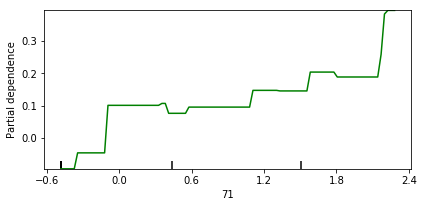

In [16]:
fig, axs = plot_partial_dependence(model, X_train, [71]) 
plt.show()